In [56]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display 
%matplotlib inline

In [58]:
def create_seed_from_email(email_str):
  running_total = 0
  for char in email_str:
    running_total += ord(char)
  return running_total
## TODO: Change the email below to your gradescope email to create your seed
seed = create_seed_from_email("oajao3@gatech.edu")
seed

1621

In [59]:
# Load the Clamp Data File CLAMP
data = pd.read_csv("ClaMP_Raw-51842.csv")
data.fillna(0)

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0       23117     144     3       0          4           0       65535     0   
1       23117     144     3       0          4           0       65535     0   
2       23117     144     3       0          4           0       65535     0   
3       23117     144     3       0          4           0       65535     0   
4       23117     144     3       0          4           0       65535     0   
...       ...     ...   ...     ...        ...         ...         ...   ...   
3325    23117     144     3       0          4           0       65535     0   
3326    23117     144     3       0          4           0       65535     0   
3327    23117     144     3       0          4           0       65535     0   
3328    23117     144     3       0          4           0       65535     0   
3329    23117     144     3       0          4           0       65535     0   

      e_sp  e_csum  ...  CheckSum  Subsystem  DllCharacteristics  \
0      184       0  ...   1194954          3                  64   
1      184       0  ...         0          2                   0   
2      184       0  ...     67688          2                 320   
3      184       0  ...    113668          2                1344   
4      184       0  ...     69089          2               33088   
...    ...     ...  ...       ...        ...                 ...   
3325   184       0  ...         0          2                   0   
3326   184       0  ...         0          2                   0   
3327   184       0  ...     78801          2               32768   
3328   184       0  ...    120490          2                   0   
3329   184       0  ...         0          2                   0   

      SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  \
0                1048576               4096            1048576   
1                1048576               4096            1048576   
2                1048576               4096            1048576   
3                1048576               4096            1048576   
4                 262144               8192            1048576   
...                  ...                ...                ...   
3325            29360128              36864           28311552   
3326             3145728              12288           23068672   
3327             1048576               4096            1048576   
3328             1048576               4096            1048576   
3329             4194304              16384           19922944   

      SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  class  
0                 4096            0                   16      0  
1                 4096            0                   16      0  
2                 4096            0                   16      0  
3                 4096            0                   16      0  
4                 4096            0                   16      0  
...                ...          ...                  ...    ...  
3325             12288            0                   16      1  
3326             36864            0                   16      1  
3327              4096            0                   16      1  
3328              4096            0                   16      1  
3329              4096            0                   16      1  

[3330 rows x 56 columns]

In [60]:
# This displays the top 5 Records
display(data.head(5))

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
0    23117     144     3       0          4           0       65535     0   
1    23117     144     3       0          4           0       65535     0   
2    23117     144     3       0          4           0       65535     0   
3    23117     144     3       0          4           0       65535     0   
4    23117     144     3       0          4           0       65535     0   

   e_sp  e_csum  ...  CheckSum  Subsystem  DllCharacteristics  \
0   184       0  ...   1194954          3                  64   
1   184       0  ...         0          2                   0   
2   184       0  ...     67688          2                 320   
3   184       0  ...    113668          2                1344   
4   184       0  ...     69089          2               33088   

   SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  SizeOfHeapCommit  \
0             1048576               4096            1048576              4096   
1             1048576               4096            1048576              4096   
2             1048576               4096            1048576              4096   
3             1048576               4096            1048576              4096   
4              262144               8192            1048576              4096   

   LoaderFlags  NumberOfRvaAndSizes  class  
0            0                   16      0  
1            0                   16      0  
2            0                   16      0  
3            0                   16      0  
4            0                   16      0  

[5 rows x 56 columns]

In [61]:
# This displays the bottom 5 Records
display(data.tail(5))

e_magic  e_cblp  e_cp  e_crlc  e_cparhdr  e_minalloc  e_maxalloc  e_ss  \
3325    23117     144     3       0          4           0       65535     0   
3326    23117     144     3       0          4           0       65535     0   
3327    23117     144     3       0          4           0       65535     0   
3328    23117     144     3       0          4           0       65535     0   
3329    23117     144     3       0          4           0       65535     0   

      e_sp  e_csum  ...  CheckSum  Subsystem  DllCharacteristics  \
3325   184       0  ...         0          2                   0   
3326   184       0  ...         0          2                   0   
3327   184       0  ...     78801          2               32768   
3328   184       0  ...    120490          2                   0   
3329   184       0  ...         0          2                   0   

      SizeOfStackReserve  SizeOfStackCommit  SizeOfHeapReserve  \
3325            29360128              36864           28311552   
3326             3145728              12288           23068672   
3327             1048576               4096            1048576   
3328             1048576               4096            1048576   
3329             4194304              16384           19922944   

      SizeOfHeapCommit  LoaderFlags  NumberOfRvaAndSizes  class  
3325             12288            0                   16      1  
3326             36864            0                   16      1  
3327              4096            0                   16      1  
3328              4096            0                   16      1  
3329              4096            0                   16      1  

[5 rows x 56 columns]

# Data Exploration

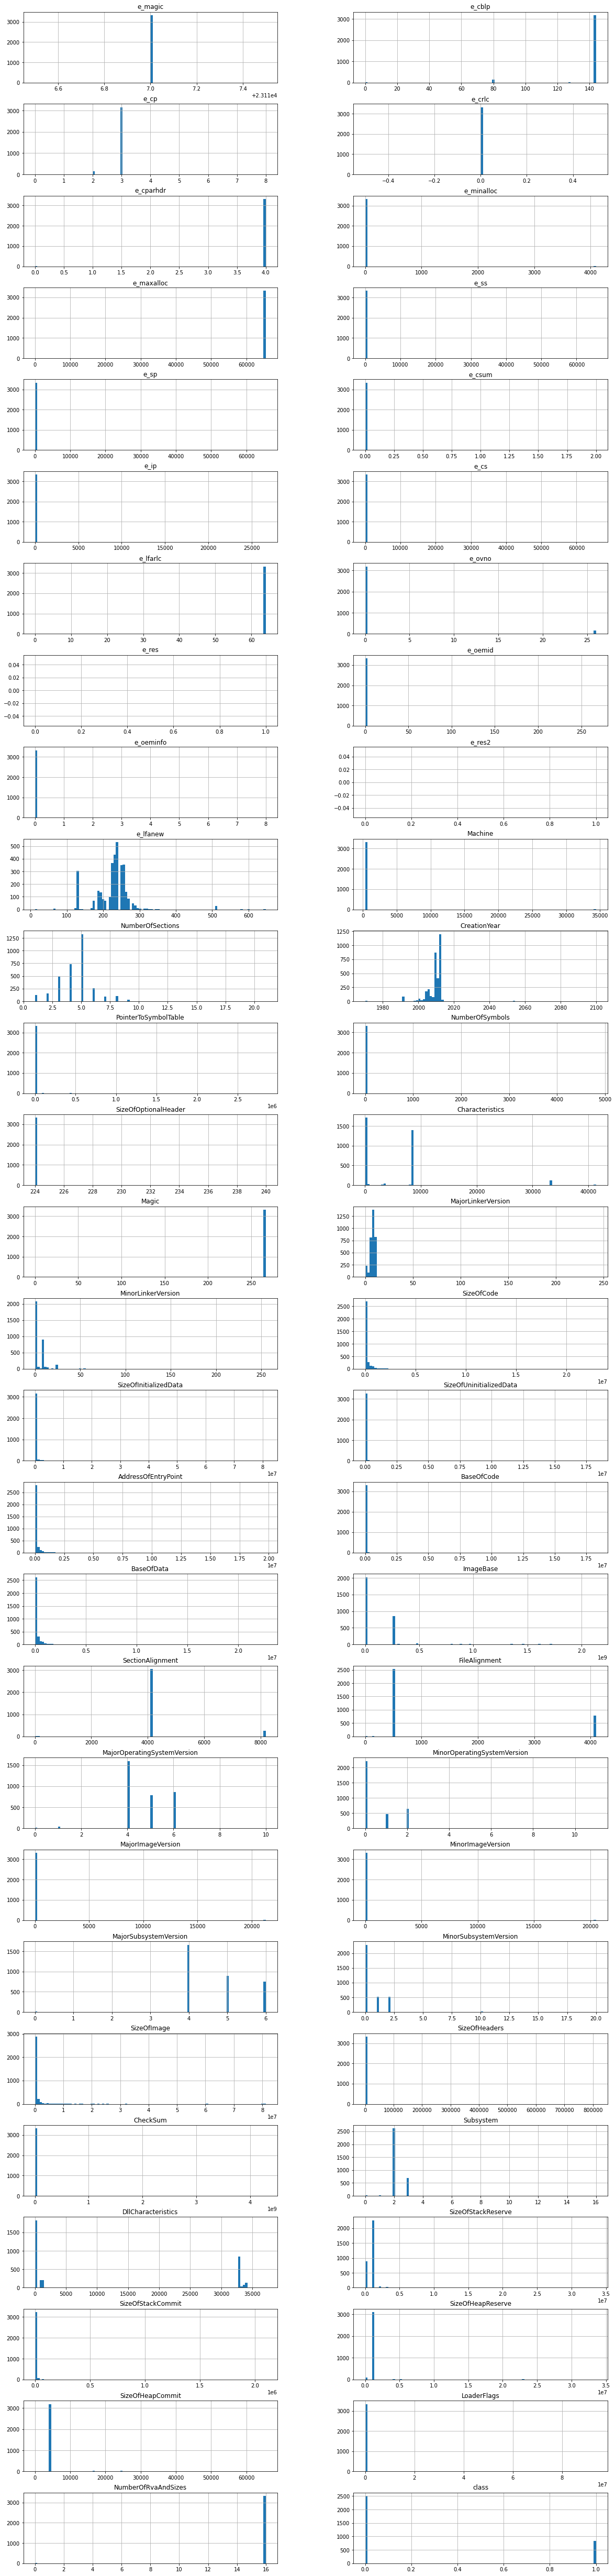

In [62]:
#Display the distribution of the dataset (Note: that the last column from this dataset, 'Class', will be our target label)
columns =data.columns.values.tolist()
data[columns].hist(stacked=False, bins=100, figsize=(20,180), layout=(56,2));

In [63]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (22.0 MB)
  Preparing metadata (setup.py) ... done

[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: pip install --upgrade pip


In [66]:
from pandas_profiling import ProfileReport

In [67]:
profile = ProfileReport(data, minimal=True)

In [68]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [100]:
# Quick look into the dataset metrics
data.shape

(3330, 56)

In [70]:
#Total number of records
n_records = len(data['class'])
print(n_records)

#OR
#n_records = data.shape[0]
#print(n_records)

3330


In [71]:
#Number of records where malware was not detected
n_non_malware =data['class'].value_counts()[0]
print(n_non_malware)

#OR
#n_non_malware = data[data["class"]==0].shape[0]
#print(n_non_malware)

2501


In [72]:
#Number of records where where malware was detected
n_malware = data['class'].value_counts()[1]
print(n_malware)

#OR
#n_malware = data[data["class"]== 1].shape[0]
#print(n_malware)

829


In [73]:
data['class'].value_counts()

0    2501
1     829
Name: class, dtype: int64

In [74]:
# Percentage of instances of malware
greater_percent = (data['class'].value_counts()/len(data)*100)
print(greater_percent) 

0    75.105105
1    24.894895
Name: class, dtype: float64


In [75]:
#grapgh showing the greater percentage between 0 (malware was not detected) and 1 (malware was detected)
greater_percent.plot(kind='bar')

<AxesSubplot:>

<AxesSubplot:ylabel='class'>

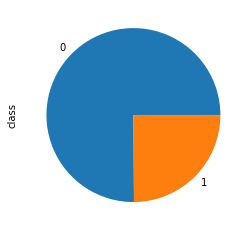

In [76]:
#grapgh showing the greater percentage between 0 (malware was not detected) and 1 (malware was detected)
greater_percent.plot(kind='pie')

In [77]:
greater_percent = 100*n_non_malware/n_records
print(greater_percent)

75.10510510510511


In [78]:
section_1 = {    
    "n_records": n_records,
    "n_non_malware": n_non_malware,
    "n_malware": n_malware,
    "greater_percent": greater_percent
    }

In [79]:
print(section_1)

{'n_records': 3330, 'n_non_malware': 2501, 'n_malware': 829, 'greater_percent': 75.10510510510511}


In [ ]:
import json

all_sections = {**section_1}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

In [80]:
# Checking for the datatype in the dataset
data_types = data.dtypes
print(data_types)

e_magic                          int64
e_cblp                           int64
e_cp                             int64
e_crlc                           int64
e_cparhdr                        int64
e_minalloc                       int64
e_maxalloc                       int64
e_ss                             int64
e_sp                             int64
e_csum                           int64
e_ip                             int64
e_cs                             int64
e_lfarlc                         int64
e_ovno                           int64
e_res                          float64
e_oemid                          int64
e_oeminfo                        int64
e_res2                         float64
e_lfanew                         int64
Machine                          int64
NumberOfSections                 int64
CreationYear                     int64
PointerToSymbolTable             int64
NumberOfSymbols                  int64
SizeOfOptionalHeader             int64
Characteristics          

In [81]:
# Get the data types from the dataset and return a count in unique_data_types
unique_data_types = len(data.dtypes.unique())
print("There are {} unique data types".format(unique_data_types))

There are 2 unique data types


# Feature set

## Determining Feature Classifications

In [82]:
print(len(data.columns))
data.columns

56


Index(['e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr', 'e_minalloc',
       'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs', 'e_lfarlc',
       'e_ovno', 'e_res', 'e_oemid', 'e_oeminfo', 'e_res2', 'e_lfanew',
       'Machine', 'NumberOfSections', 'CreationYear', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfImage',
       'SizeOfHeaders', 'CheckSum', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSiz

In [85]:
drop_features = ["e_magic","e_crlc","e_res","e_res2"]
numerical_features = ["e_cblp","e_cp","e_cparhdr","e_minalloc","e_maxalloc","e_ss","e_sp","e_ip","e_cs","e_lfarlc","e_ovno","e_lfanew",
                      "NumberOfSections","CreationYear","PointerToSymbolTable","NumberOfSymbols","SizeOfOptionalHeader",
                      "SizeOfCode","SizeOfInitializedData","SizeOfUninitializedData","AddressOfEntryPoint","BaseOfCode","BaseOfData",
                      "ImageBase","SectionAlignment","FileAlignment",
                      "SizeOfImage","SizeOfHeaders","SizeOfStackReserve","SizeOfStackCommit","SizeOfHeapReserve",
                      "SizeOfHeapCommit","NumberOfRvaAndSizes"
                      ]
categorical_features = ["e_csum","e_oemid","e_oeminfo","Machine","Characteristics","Magic","CheckSum","DllCharacteristics",
                        "LoaderFlags","Subsystem","MajorOperatingSystemVersion",
                      "MinorOperatingSystemVersion","MajorImageVersion","MinorImageVersion","MajorSubsystemVersion","MinorSubsystemVersion",
                      "MajorLinkerVersion","MinorLinkerVersion"]

print("You have categorized {} of 55 features".format(len(drop_features)+len(numerical_features)+len(categorical_features)))

You have categorized 55 of 55 features


In [86]:
drop_feature_count = len(drop_features)
numerical_feature_count = len(numerical_features)
categorical_feature_count = len(categorical_features)

# Preparing the Data

In [89]:
# Split the data into features (dataframe with numerical and categorical features) and target label (pandas series with target column)

Target = data['class']
features_raw = data.drop(drop_features + ['class'], axis = 1)

In [91]:
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()

# create a dataframe with the scaled values of the features and with the same column names they had before
num_features_scaled = pd.DataFrame(scaler.fit_transform(features_raw[numerical_features]), columns=features_raw[numerical_features].columns)

# Show an example of the first 5 record with scaling applied
num_features_scaled.head()

e_cblp   e_cp  e_cparhdr  e_minalloc  e_maxalloc  e_ss      e_sp  e_ip  \
0     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
1     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
2     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
3     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
4     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   

   e_cs  e_lfarlc  ...  ImageBase  SectionAlignment  FileAlignment  \
0   0.0       1.0  ...   0.555334               0.5          0.125   
1   0.0       1.0  ...   0.125810               0.5          0.125   
2   0.0       1.0  ...   0.125810               0.5          0.125   
3   0.0       1.0  ...   0.125810               0.5          0.125   
4   0.0       1.0  ...   0.001966               0.5          0.125   

   SizeOfImage  SizeOfHeaders  SizeOfStackReserve  SizeOfStackCommit  \
0     0.016434       0.001263            0.031250           0.001953   
1     0.000252       0.001263            0.031250           0.001953   
2     0.000756       0.001263            0.031250           0.001953   
3     0.001159       0.000631            0.031250           0.001953   
4     0.000706       0.001263            0.007812           0.003906   

   SizeOfHeapReserve  SizeOfHeapCommit  NumberOfRvaAndSizes  
0            0.03125            0.0625                  1.0  
1            0.03125            0.0625                  1.0  
2            0.03125            0.0625                  1.0  
3            0.03125            0.0625                  1.0  
4            0.03125            0.0625                  1.0  

[5 rows x 33 columns]

# Implementation: Data Preprocessing One Hot Encoding 

In [95]:
cat_features_raw = features_raw[categorical_features].copy()
for col in categorical_features:
  cat_features_raw[col] = cat_features_raw[col].astype("category") #setting each feature as type category

In [98]:
# Given what you know about the data do you think our dataset will gain any usability by one hot encoding columns? (return either "yes" or "no")
one_hot_encoding = 'yes'

# If you answered yes then use pandas get_dummies function and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding
num_features_encoded_all = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_all))


2738 total features after one-hot encoding.


In [105]:
# select categorical features from the dataset and set them as a category
cat_features_raw = features_raw[list(set(categorical_features)-set(["SizeOfCode","SizeOfInitializedData","AddressOfEntryPoint","BaseOfData","ImageBase","SizeOfImage","CheckSum"]))].copy()
for col in list(set(categorical_features)-set(["SizeOfCode","SizeOfInitializedData","AddressOfEntryPoint","BaseOfData","ImageBase","SizeOfImage","CheckSum"])):
                cat_features_raw[col] = cat_features_raw[col].astype("category")
# one hot encode the features and drop the first category
cat_features_final = pd.get_dummies(cat_features_raw, drop_first=True)

# Print the number of categorical features after one-hot encoding (with CheckSum removed)
num_features_encoded_final = cat_features_final.shape[1]
print("{} total features after one-hot encoding.".format(num_features_encoded_final))

183 total features after one-hot encoding.


# Joining Data

In [106]:
# This combines and cleans the data and removes any nan values
features_final = pd.concat([num_features_scaled,cat_features_final],axis=1)

features_final = features_final.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
display(features_final.head(5))

e_cblp   e_cp  e_cparhdr  e_minalloc  e_maxalloc  e_ss      e_sp  e_ip  \
0     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
1     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
2     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
3     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   
4     1.0  0.375        1.0         0.0         1.0   0.0  0.002808   0.0   

   e_cs  e_lfarlc  ...  Subsystem_9  Subsystem_16  \
0   0.0       1.0  ...            0             0   
1   0.0       1.0  ...            0             0   
2   0.0       1.0  ...            0             0   
3   0.0       1.0  ...            0             0   
4   0.0       1.0  ...            0             0   

   MajorOperatingSystemVersion_1  MajorOperatingSystemVersion_4  \
0                              0                              1   
1                              0                              1   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   MajorOperatingSystemVersion_5  MajorOperatingSystemVersion_6  \
0                              0                              0   
1                              0                              0   
2                              1                              0   
3                              0                              1   
4                              0                              1   

   MajorOperatingSystemVersion_7  MajorOperatingSystemVersion_8  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   MajorOperatingSystemVersion_9  MajorOperatingSystemVersion_10  
0                              0                               0  
1                              0                               0  
2                              0                               0  
3                              0                               0  
4                              0                               0  

[5 rows x 216 columns]

#  Train/Test Dataset Split

In [110]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'Target' data into training and testing sets using a train set that is 80% of the data and a random state of np.random.RandomState(seed)
X_train, X_test, y_train, y_test = train_test_split(features_final, Target, test_size=0.2, random_state=np.random.RandomState(seed))

n_train_records = X_train.shape[0]
n_test_records = X_test.shape[0]

# Show the results of the split
print("Training set has {} samples.".format(n_train_records))
print("Testing set has {} samples.".format(n_test_records))

Training set has 2664 samples.
Testing set has 666 samples.


In [111]:
section_2 = {    
    "unique_data_types": unique_data_types,
    "drop_feature_count":drop_feature_count,
    "numerical_feature_count":numerical_feature_count,
    "categorical_feature_count":categorical_feature_count,
    "one_hot_encoding": one_hot_encoding,
    "num_features_encoded_all": num_features_encoded_all,
    "num_features_encoded_final":num_features_encoded_final,
    "n_train_records": n_train_records,
    "n_test_records": n_test_records
    }

In [ ]:
all_sections = {**section_1,**section_2}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

# Section 3: Creating Models on the Data

# Evaluate the Naive Predictor Performace

In [113]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# you can read up more on each of these sklearn metrics here: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics 

#TODO: Calculate accuracy, precision, recall and F-Score for the Test Data assuming the model predicts every sample is NOT malware 

naive_accuracy = accuracy_score(y_test,[1]*len(y_test))
naive_recall = recall_score(y_test,[1]*len(y_test))
naive_precision = precision_score(y_test,[1]*len(y_test))
naive_fscore = f1_score(y_test,[1]*len(y_test))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, Recall: {:.4f}, Precision: {:.4f}, F-score: {:.4f}]".format(naive_accuracy, naive_recall, naive_precision, naive_fscore))

Naive Predictor: [Accuracy score: 0.2327, Recall: 1.0000, Precision: 0.2327, F-score: 0.3776]


In [130]:
section_3 = {
    "naive_accuracy": round(naive_accuracy,4),
    "naive_recall": round(naive_recall,4),
    "naive_precision": round(naive_precision,4),
    "naive_fscore": round(naive_fscore,4),
}

In [ ]:
all_sections = {**section_1,**section_2,**section_3}
with open('submission.json', 'w') as f:
     f.write(json.dumps(all_sections))

## Section 3.1: Supervised Learning Models

### Logistic Regression

In [134]:
#Initialize Model

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=np.random.RandomState(seed),penalty='l2', max_iter=1000)

In [135]:
#Train Model
logreg.fit(X_train,y_train)
pred_binary = logreg.predict(X_test)
predicted_probas = logreg.predict_proba(X_test)

In [136]:
from sklearn.metrics import auc,roc_curve
logreg_accuracy = 0 
logreg_recall = 0
logreg_precision = 0
logreg_fscore = 0
logreg_roc_auc = 0

In [138]:
from sklearn.metrics import roc_curve, auc
probs = logreg.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

#MethodI: plt
import matplotlib.pyplot as plt
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc = "lower right")
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Posotive Rate')
plt.show()

In [140]:
from sklearn.feature_selection import RFE
selector = RFE(logreg, n_features_to_select=5, step=1)
selector = selector.fit(X_train,y_train)

importance_df = pd.DataFrame({"ranking":selector.ranking_, "col_name":X_train.columns,
                             "coef":selector.estimator.coef_[0], "absolute_val_coef":list(map(abs, selector.estimator.coef_[0]))
                             }).sort_values(["ranking","absolute_val_coef"], ascending=[True,False]).reset_index(drop=True)

In [141]:
importance_df

ranking                       col_name      coef  absolute_val_coef
0          1       DllCharacteristics_33088 -3.502553           3.502553
1          1                       e_lfanew -3.344506           3.344506
2          1                      ImageBase -2.188536           2.188536
3          1               SectionAlignment -2.104434           2.104434
4          1              SizeOfHeapReserve  0.947202           0.947202
..       ...                            ...       ...                ...
211      208           Characteristics_8458  0.000000           0.000000
212      209         MinorImageVersion_1266  0.000000           0.000000
213      210  MajorOperatingSystemVersion_8  0.000000           0.000000
214      211       DllCharacteristics_32960  0.000000           0.000000
215      212           LoaderFlags_93827511  0.000000           0.000000

[216 rows x 4 columns]